Which Factors Influence the Price of Health Insurance?

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

EDA and Visualizations

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# 1338 rows and 7 columns in the dataset

insurance_df.shape

(1338, 7)

In [6]:
# Checking the descriptive statistics of the dataframe

insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Let's see, if the dataframe consists of missing values. No missing values

insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Checking the data type of the dataframe columns

insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Text(0.5, 1.0, 'Distribution of Charges')

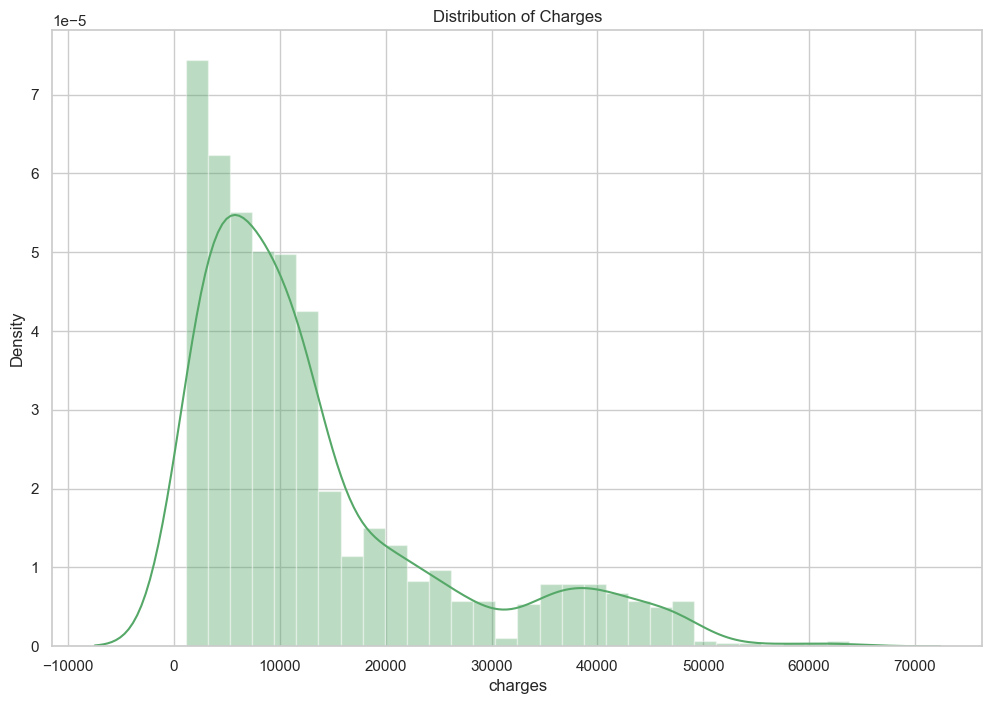

In [15]:
# PLotting the graphs to visualize the data and find patterns

sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(insurance_df['charges'], kde = True, color = 'g')
plt.title('Distribution of Charges')

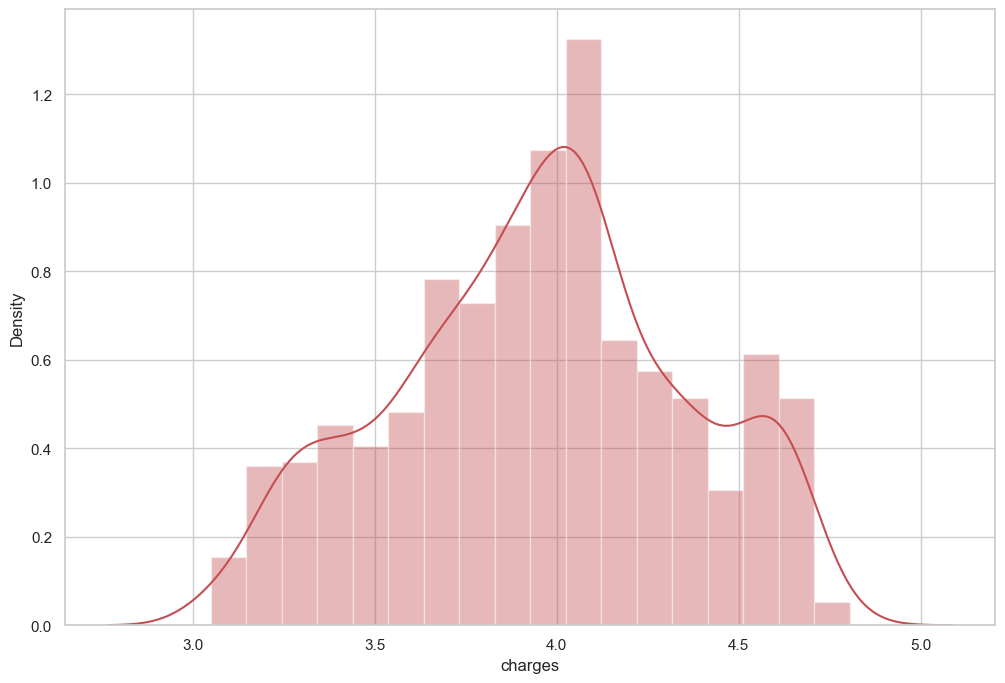

In [17]:
# This distribution is right-skewed. To make it closer to normal we can apply natural log

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(insurance_df['charges']), kde = True, color = 'r' )

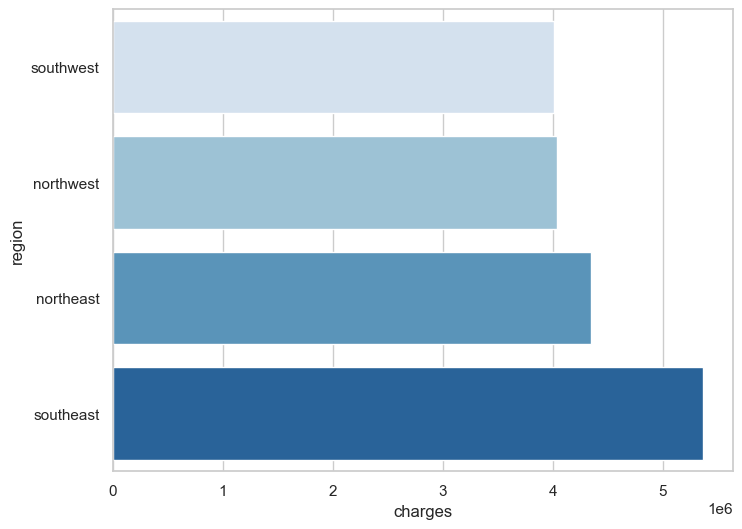

In [55]:
charges = insurance_df['charges'].groupby(insurance_df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(data = insurance_df, x= charges.head(), y= charges.head().index, palette='Blues')

It is evident that southeast has the highest charges of all the regions. Taking into account certain factors (sex, smoking, having children) let's see how these change by region.

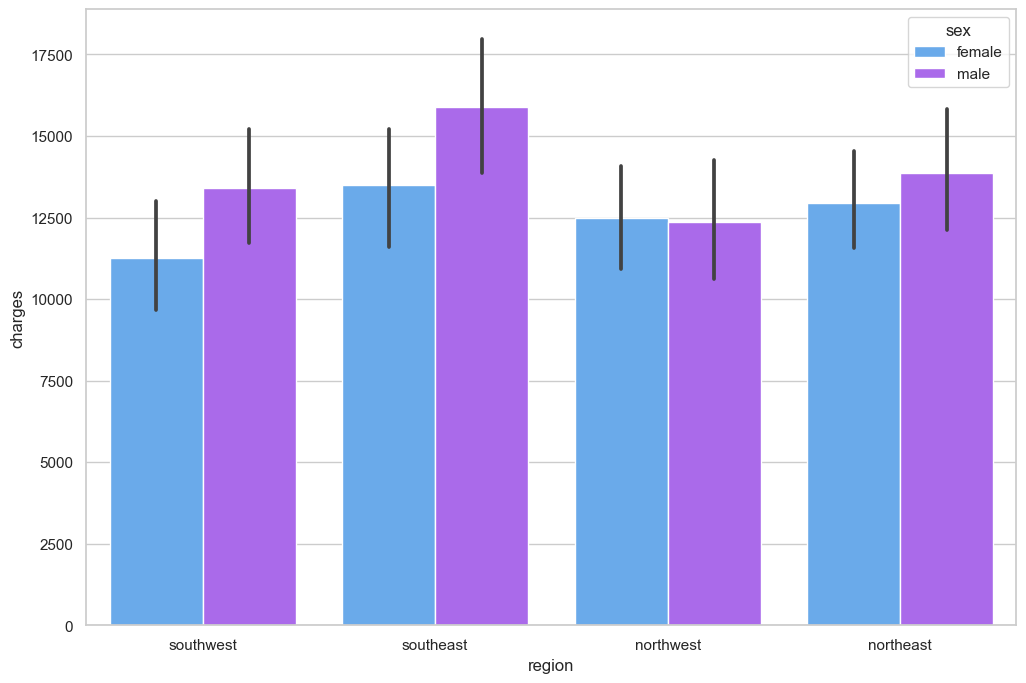

In [56]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=insurance_df, palette='cool')

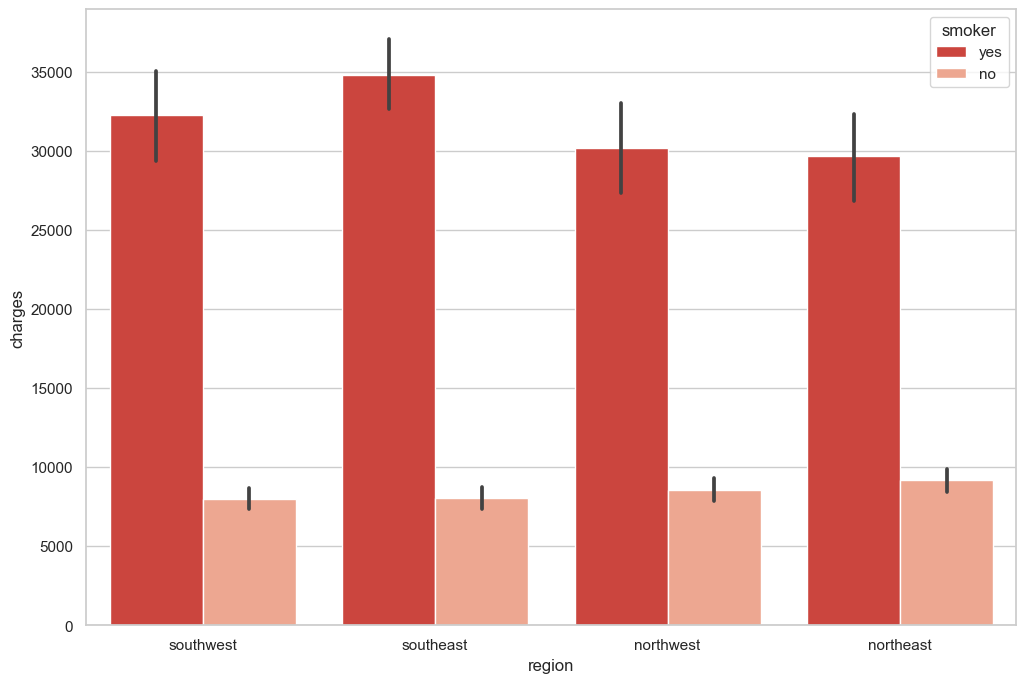

In [57]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=insurance_df, palette='Reds_r')

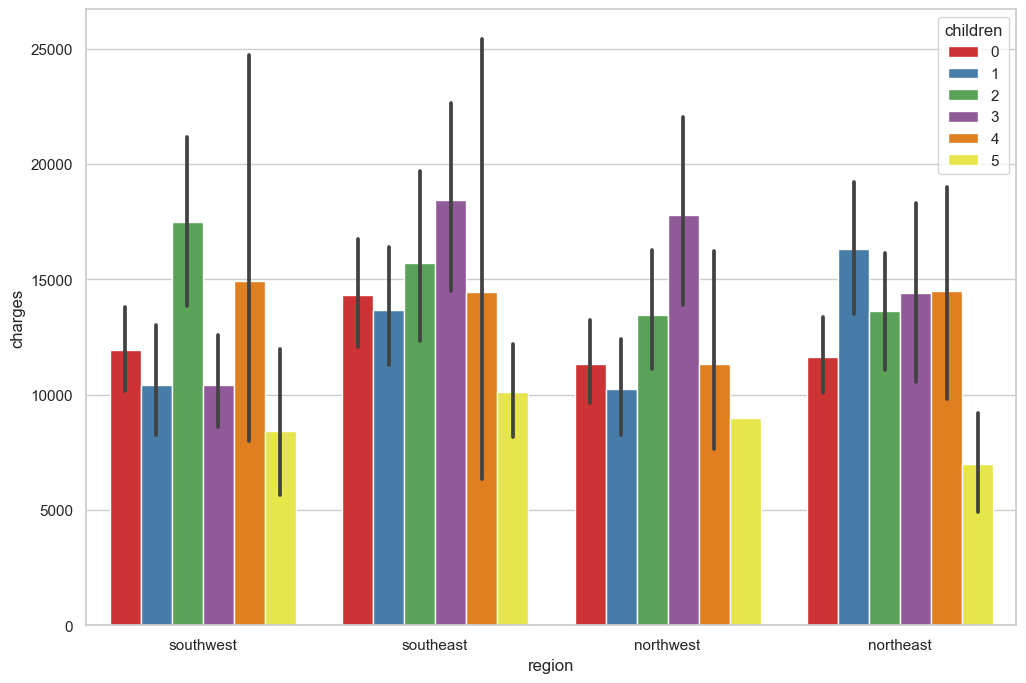

In [58]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=insurance_df, palette='Set1')

As we can see from these barplots, the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.

Now let's analyze the medical charges by age, bmi and children, according to the smoking factor

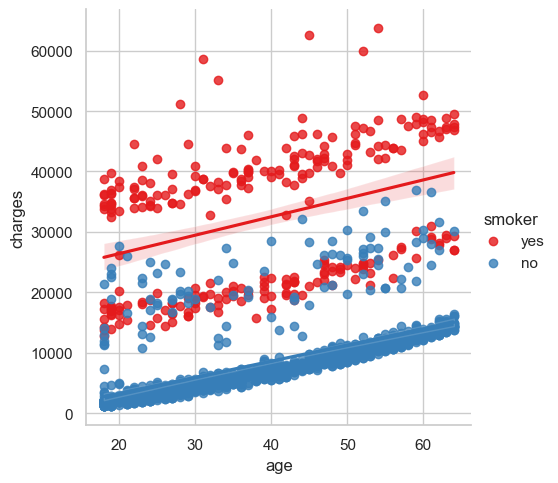

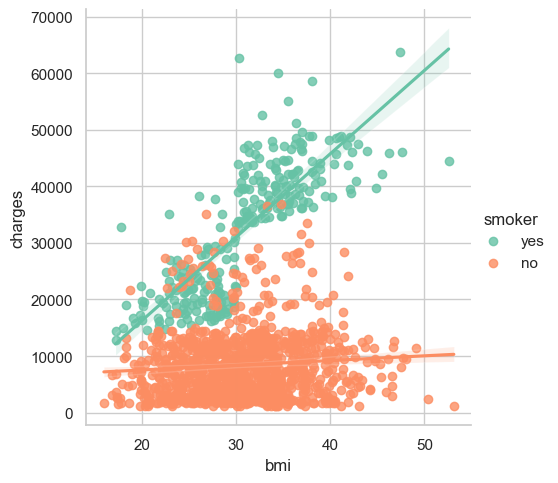

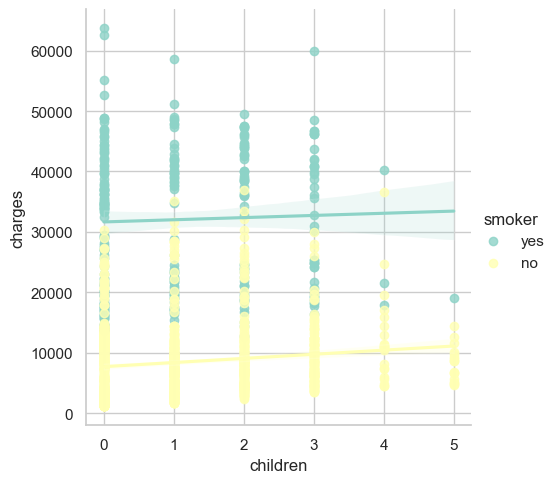

In [59]:
ax = sns.lmplot(x = 'age', y = 'charges', data=insurance_df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=insurance_df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=insurance_df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too.

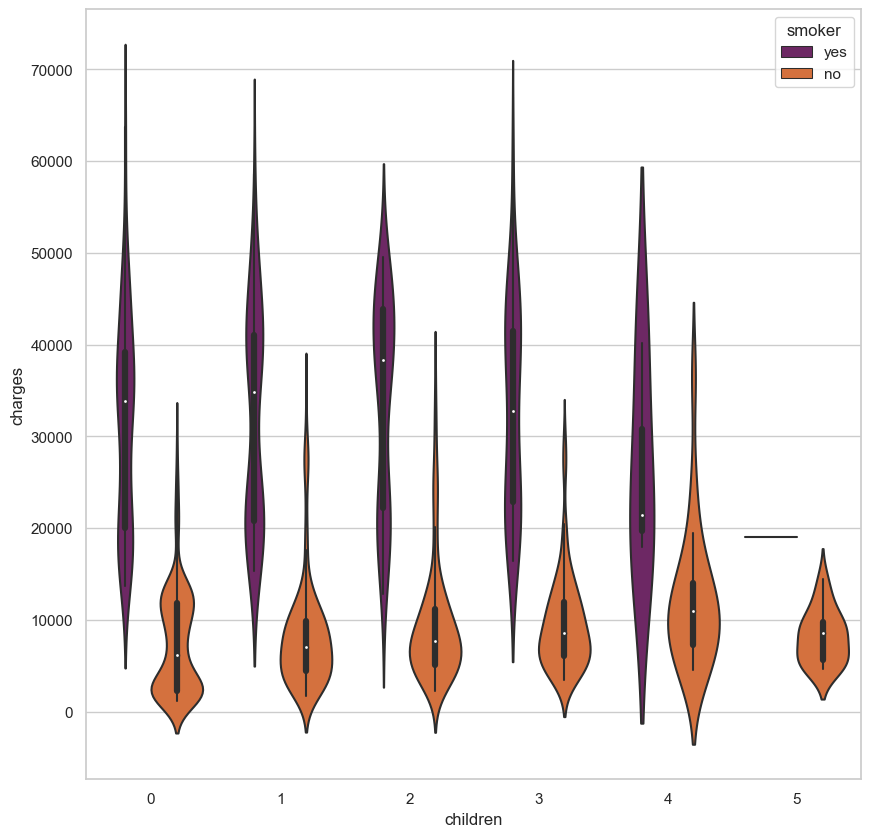

In [60]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=insurance_df,
                 orient='v', hue='smoker', palette='inferno')

In [62]:
# Converting object columns into categorical

insurance_df[['sex', 'smoker', 'region']] = insurance_df[['sex', 'smoker', 'region']].astype('category')

insurance_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [64]:
# Converting category labels into numerical using LabelEncoder

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(insurance_df.sex.drop_duplicates())
insurance_df.sex = label.transform(insurance_df.sex)
label.fit(insurance_df.smoker.drop_duplicates())
insurance_df.smoker = label.transform(insurance_df.smoker)
label.fit(insurance_df.region.drop_duplicates())
insurance_df.region = label.transform(insurance_df.region)

insurance_df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

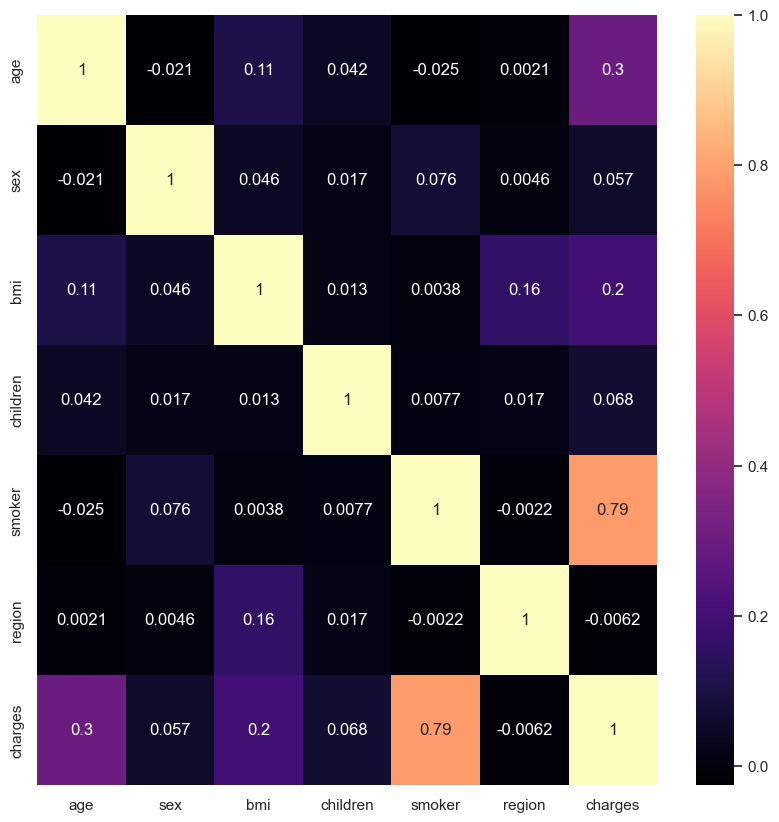

In [68]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(insurance_df.corr(), annot=True, cmap='magma')

No correlation, except with the smoking

In [70]:
# Linear Regression fitting

from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = insurance_df.drop(['charges'], axis = 1)
y = insurance_df['charges']

x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824424
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


In [71]:
# Ridge Regression

from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)

print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.44092749581
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063138


In [72]:
# Lasso Regression

from sklearn.linear_model import Lasso

Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)

print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039537
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


In [79]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor as rfr

x = insurance_df.drop(['charges'], axis=1)
y = insurance_df.charges

Rfr = rfr(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
Rfr.fit(x_train,y_train)

x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f\nMSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))

print('R2 train data: %.3f\nR2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred),
       metrics.r2_score(y_test,x_test_pred)))

MSE train data: 3628893.887
MSE test data: 19730453.910
R2 train data: 0.975
R2 test data: 0.876


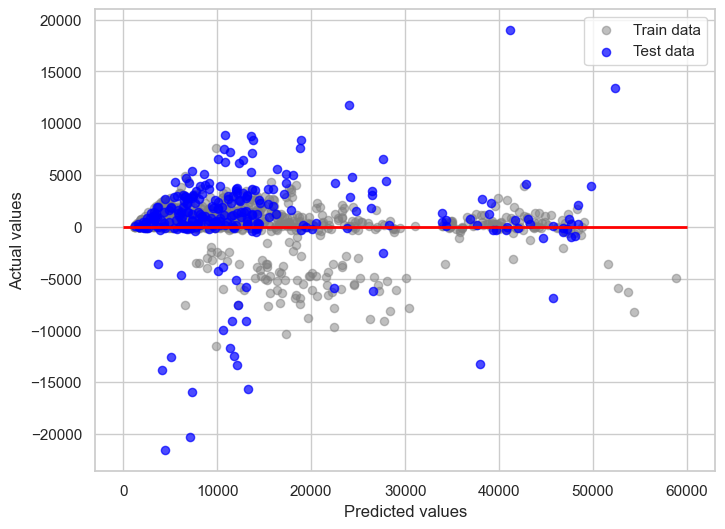

In [80]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

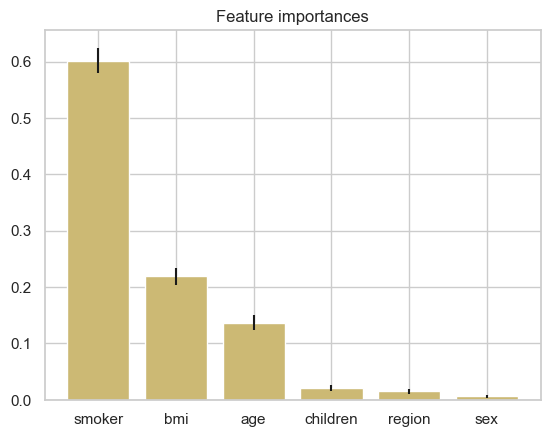

In [81]:
print('Feature importance ranking\n\n')

importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)

indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']

importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [82]:
# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

x = insurance_df.drop(['charges', 'sex', 'region'], axis = 1)
y = insurance_df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)

Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.8817052524555
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.881259570334522


In [83]:
# Evaluating the performance of the model 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776476
Mean Squared Error: 18895160.09878052
Root Mean Squared Error: 4346.85634669246


In [84]:
# Predicting the charges

y_test_pred = Pol_reg.predict(x_test)

# Comparing the actual output values with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df.head()

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727


Conclusion: Like we previously noticed, smoking is the most important factor that affects the medical cost charges, followed by bmi and age. 

Polynomial Regression turned out to be the best model